Basic data visualization with python
==========
Some sort of description!

Link to related slides --> 

In [2]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Let's first gather our dataset

In [3]:
## Uncomment the line below and enter the path to where you
## downloaded the dataset

datadir = '/data1/users/jvogel/nilearn_tutorial/MAIN_Nilearn/'


Load the spreadsheet

In [116]:
pheno_file = os.path.join(datadir, 'participants.tsv')

pheno = pandas.read_csv(pheno_file,sep='\t')

pheno.head()

,participant_id,Age,AgeGroup,Child_Adult,Gender,Handedness,ToM Booklet-Matched,ToM Booklet-Matched-NOFB,FB_Composite,FB_Group,WPPSI BD raw,WPPSI BD scaled,KBIT_raw,KBIT_standard,DCCS Summary,Scanlog: Scanner,Scanlog: Coil,Scanlog: Voxel slize,Scanlog: Slice Gap
0,sub-pixar052,5.46,5yo,child,F,R,0.681818,0.625000,5.0,pass,NaN,NaN,27.0,130.0,2.0,3T2,32ch adult,3mm iso,0.1
1,sub-pixar109,10.38,8-12yo,child,F,R,0.960000,0.947368,6.0,pass,NaN,NaN,30.0,100.0,NaN,3T1,32ch adult,3.13 mm iso,None
2,sub-pixar042,5.01,5yo,child,F,L,0.681818,0.750000,3.0,inc,NaN,NaN,18.0,110.0,2.0,3T2,32ch adult,3mm iso,0.1
3,sub-pixar068,7.92,7yo,child,F,R,0.863636,0.875000,5.0,pass,NaN,NaN,38.0,137.0,NaN,3T2,32ch adult,3mm iso,0.1
4,sub-pixar110,10.78,8-12yo,child,F,R,1.000000,1.000000,6.0,pass,NaN,NaN,38.0,122.0,NaN,3T1,32ch adult,3.13 mm iso,None


What are our different variables?

In [6]:
pheno.columns

Index(['participant_id', 'Age', 'AgeGroup', 'Child_Adult', 'Gender',
       'Handedness', 'ToM Booklet-Matched', 'ToM Booklet-Matched-NOFB',
       'FB_Composite', 'FB_Group', 'WPPSI BD raw', 'WPPSI BD scaled',
       'KBIT_raw', 'KBIT_standard', 'DCCS Summary', 'Scanlog: Scanner',
       'Scanlog: Coil', 'Scanlog: Voxel slize', 'Scanlog: Slice Gap'],
      dtype='object')

### Univariate visualization

Let's start by having a quick look at the summary statistics and distribution of Age

In [7]:
# summary statistics
print(pheno['Age'].describe())

count    83.000000
mean     13.581346
std       9.884811
min       3.518138
25%       5.180000
50%       8.150000
75%      22.000000
max      39.000000
Name: Age, dtype: float64


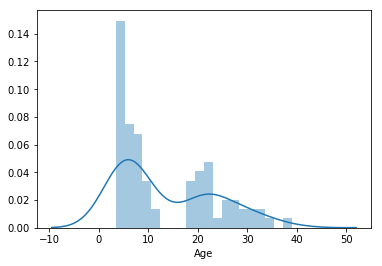

In [8]:
# simple histogram with seaborn
sns.distplot(pheno['Age'],
            bins=20,          # increase "resolution"
            #color='black',    # change color
            #kde=False,        # get rid of KDE (y axis=N)
            #rug=True,         # add "rug"
            )

What kind of distribution do we have here? 

Let's try log normalization as a solution. Here's one way to do that

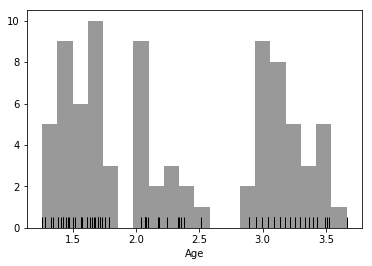

In [9]:
import numpy as np

log_age = np.log(pheno['Age'])
sns.distplot(log_age,
            bins=20,          
            color='black',    
            kde=False,         
            rug=True,          
            )

There is another approach for log-transforming that is perhaps better practice, and generalizable to *nearly any* type of transformation:

With sklearn, you can great a custom transformation object, which can be applied to different datasets.

Advantages:
* Can be easily reversed at any time
* Perfect for basing transformation off one dataset and applying it to a different dataset

Distadvantages:
* Expects 2D data (but that's okay)
* More lines of code :(

In [10]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, validate=True)

age2d = pheno['Age'].values.reshape(-1,1)
#log_transformer.fit(pheno['Age'])
log_transformer.fit(age2d)



sk_log_Age = log_transformer.transform(age2d)

In [11]:
# Are two log transformed datasets are equal?
all(sk_log_Age[:,0] == log_age)

True

And we can easily reverse this normalization to return to the original values for age.

In [12]:
reverted_age = log_transformer.inverse_transform(age2d)

# The inverse transform should be the same as our original values
all(reverted_age == age2d)

True

Another strategy would be categorization. Two type of categorization have already been done for us in this dataset. We can visualize this with pandas value_counts() or with seaborn countplot()

In [13]:
# Value counts of AgeGroup
pheno['AgeGroup'].value_counts()

Adult     33
5yo       15
4yo       11
8-12yo    10
3yo        7
7yo        7
Name: AgeGroup, dtype: int64

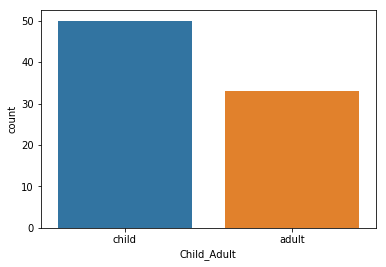

In [14]:
# Countplot of Child_Adult

sns.countplot(pheno['Child_Adult'])

### Bivariate visualization: Linear x Linear

Cool! Now let's play around a bit with bivariate visualization. 

For example, we could look at the association between age and a cognitive phenotype like Theory of Mind or "intelligence". We can start with a scatterplot. A quick and easy scatterplot can be built with regplot()

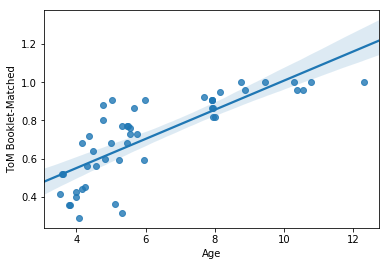

In [24]:
sns.regplot(x=pheno['Age'], y=pheno['ToM Booklet-Matched'])

regplot() will automatically drop missing values (pairwise). There are also a number of handy and very quick arguments to change the nature of the plot

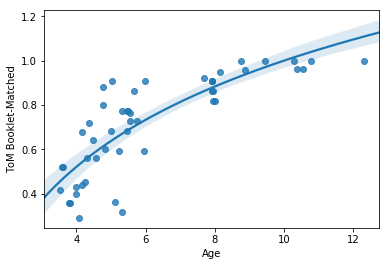

In [132]:
## Try uncommenting these lines (one at a time) to see how
## the plot changes.

sns.regplot(x=pheno['Age'], y=pheno['ToM Booklet-Matched'],
           #order=2,        # fit a quadratic curve
           #lowess=True,    # fit a lowess curve
           #fit_reg = False # no regression line
           #marker = ''     # no points
           #marker = 'x',   # xs instead of points
           #x_partial = pheno['KBIT_standard'] # partial out 
                                              # intelligence
           )

Take a minute to try plotting another set of variables

In [ ]:
#sns.regplot(x=, y=)

This would be as good a time as any to remind you that seaborn is built on top of matplotlib. Any seaborn object could be built from scratch from a matplotlib object. For example, regplot is built on top of plt.scatter

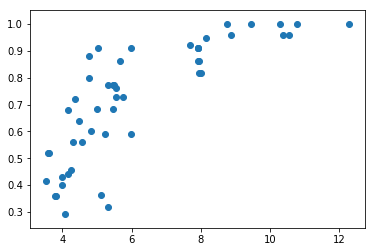

In [66]:
plt.scatter(x=pheno['Age'], y=pheno['ToM Booklet-Matched'])


If you want to get really funky/fancy, you can play around with jointplot() and change the "kind" argument.

However, note that jointplot is a different type of object and therefore follows different rules when it comes to editing. More on this later

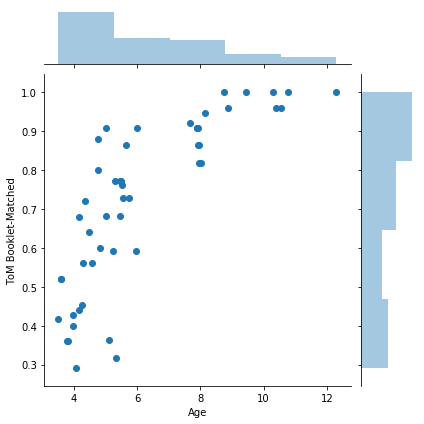

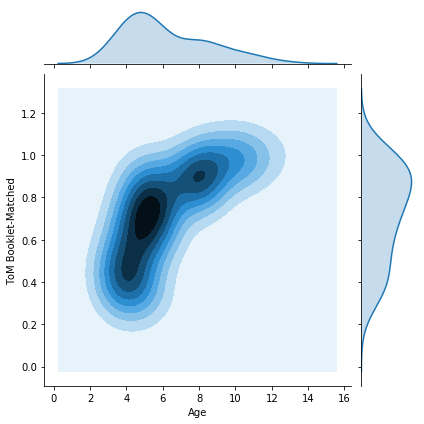

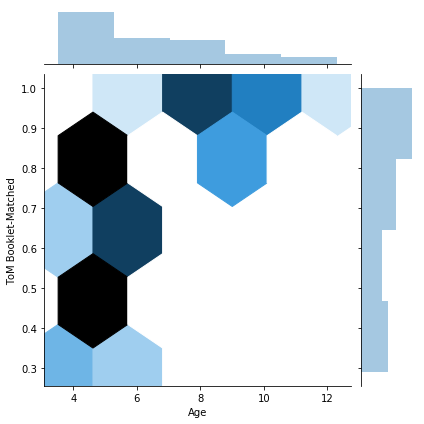

In [69]:
for kind in ['scatter','kde','hex']:
    sns.jointplot(x=pheno['Age'], y=pheno['ToM Booklet-Matched'],
                  kind=kind)

    plt.show()

That last one was a bit weird, eh? These hexplots are really built for larger sample sizes. Just to showcase this, let's plot a hexplot 1000 samples of some random data. Observe how the hex plot deals with density ins a way that the scatter plot cannot.

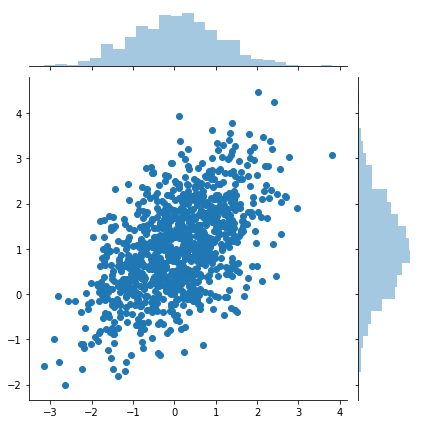

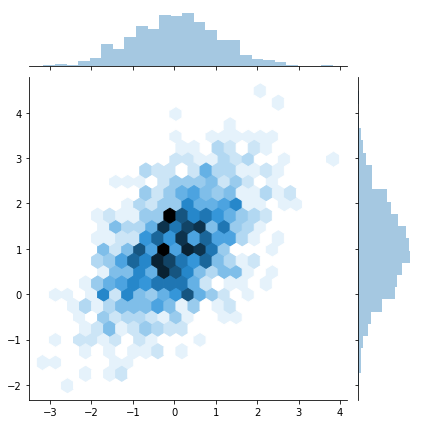

In [135]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, 1000).T
sns.jointplot(x=x, y=y, kind="scatter")
sns.jointplot(x=x, y=y, kind="hex")



However, note that jointplot is a different type of object and therefore follows different rules when it comes to editing. This is perhaps one of the biggest drawbacks of seaborn.

For example, look at how the same change requires different syntax between regplot at jointplot

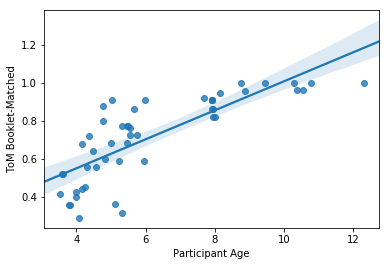

In [72]:
sns.regplot(x=pheno['Age'], y=pheno['ToM Booklet-Matched'])
plt.xlabel('Participant Age')

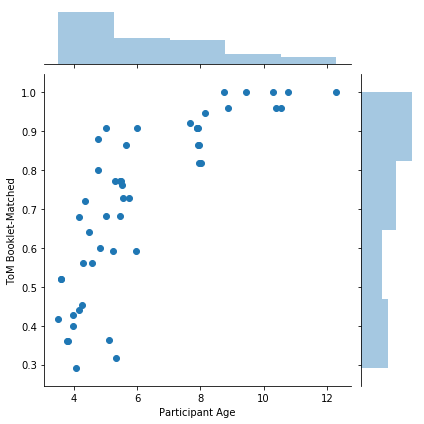

In [75]:
g = sns.jointplot(x=pheno['Age'], y=pheno['ToM Booklet-Matched'],
                  kind='scatter')
g.ax_joint.set_xlabel('Participant Age')

Finally, lmplot() is another nice scatterplot option for observing multivariate interactions.

However, lmplot() cannot simply take two arrays as input. Rather (much like R), you must pass lmplot some data (in the form of a pandas DataFrame for example) and variable names. Luckily for us, we already have our data in a pandas DataFrame, so this should be easy.

Let's look at how the relationship between Age and Theory of Mind varies by Gender. We can do this using the "hue", "col" or "row" arguments 

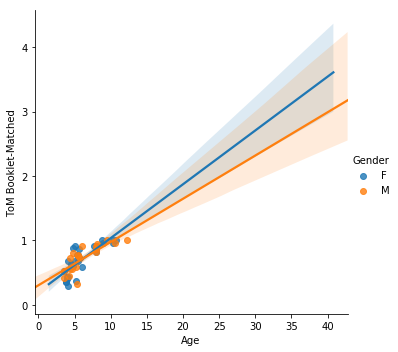

In [65]:
sns.lmplot(x='Age', y = 'ToM Booklet-Matched', 
           data = pheno, hue='Gender')

Unfortunately, these plots can be a bit dumb at times. The regplot is perhaps more flexible.

You can read more about this type of plotting here:

https://seaborn.pydata.org/tutorial/distributions.html

### Bivariate visualization: Linear x Categorical

Let's take a quick look at how to look at bivariate relationships when one variable is categorical and the other is scalar.

For consistency can continue to look at the same relationship, but look at "AgeGroup" instead of age.

There are many ways to visualize such relationships. While there are some advantages and disadvantes of each type of plot, much of the choice will come down to personal preference.

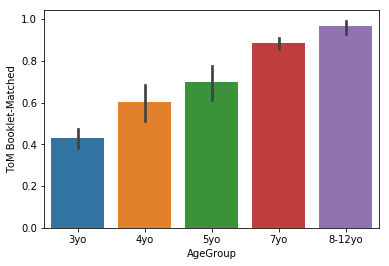

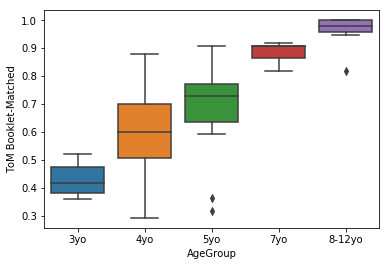

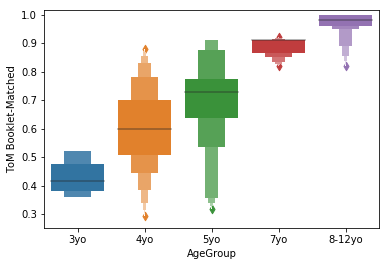

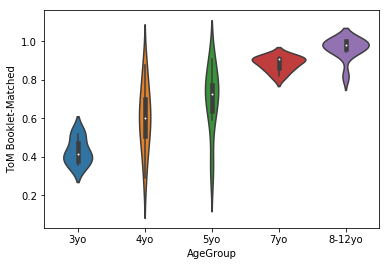

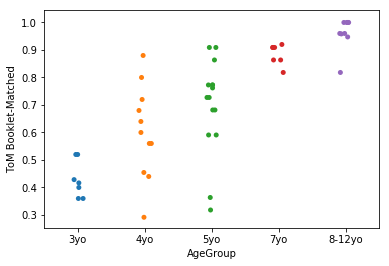

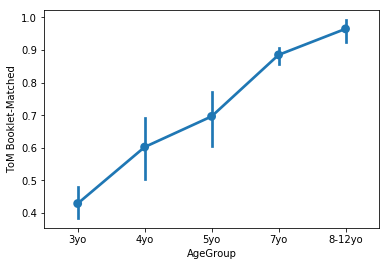

In [101]:
# Here are several ways of visualizing the same relationship
# Note that adults to not have cognitive tests, so I will not
# include adults in any of these plots. Note also that I
# explicitly pass the order of x

order = sorted(pheno.AgeGroup.unique())[:-1]

sns.barplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
            order = order)
plt.show()

sns.boxplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
            order = order)
plt.show()

sns.boxenplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
            order = order)
plt.show()

sns.violinplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
            order = order)
plt.show()

sns.stripplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
            order = order)
plt.show()

sns.pointplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
            order = order)
plt.show()

Generally, line plots and barplots are frowned upon because they do not show the actual data, and therefore can mask troublesome distributions and outliers. 

But perhaps you're really into boxplots? No problem! One nice thing about these plots is that they can be overlaid very easily. Just call two plots at once before doing plt.show() (or in this case, before running the cell). Just overlay a stripplot on top!

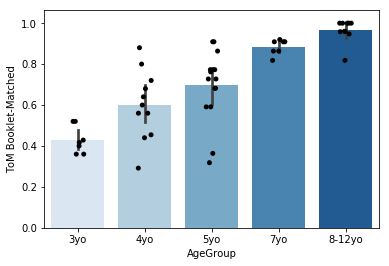

In [115]:
sns.barplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
            order = order, palette='Blues')

sns.stripplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
            order = order, color = 'black')

You can find more info on these types of plots here:

https://seaborn.pydata.org/tutorial/categorical.html

Having trouble deciding which type of plot you want to use? Checkout the raincloud plot, which combines multiple types of plots to achieve a highly empirical visualization.

![raincloud](https://wellcomeopenresearch.s3.amazonaws.com/manuscripts/16574/5019bc28-6d22-4161-958e-49d66f5eef1f_figure3.gif)


Read more about it here:
https://wellcomeopenresearch.org/articles/4-63/v1?src=rss



### Bivariate visualization: Categorical x Categorical

What if we want to observe the relationship between two categorical variables? Since we are usually just looking at counts or percentages, a simple barplot is fine in this case.

Let's look at AgeGroup x Gender. Pandas.crosstab helps sort the data in an intuitive way. 

In [118]:
pandas.crosstab(index=pheno['AgeGroup'],
                columns=pheno['Gender'],)

Gender,F,M
AgeGroup,,
3yo,5,2
4yo,6,5
5yo,9,6
7yo,5,2
8-12yo,5,5
Adult,20,13


We can actually plot this directly from pandas.

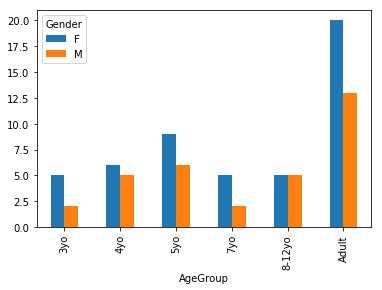

In [119]:
pandas.crosstab(index=pheno['AgeGroup'],
                columns=pheno['Gender'],).plot.bar()

The above plot gives us absolute counts. Perhaps we'd rather visualize differences in proportion across age groups. Unfortunately we must do this manually.

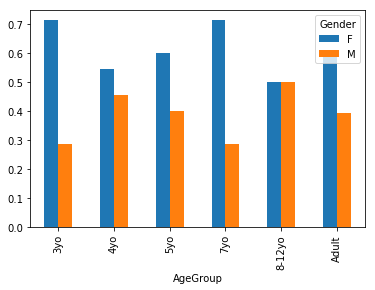

In [131]:
crosstab = pandas.crosstab(index=pheno['AgeGroup'],
                columns=pheno['Gender'],)

crosstab.apply(lambda r: r/r.sum(), axis=1).plot.bar()


### Style points

In [ ]:
g.get_figure().savefig('/home/users/jvogel/git/NeuroDataSci-course-2019/content/day4/AM/Count.png',
                      bbox_inches = 'tight')